# **Import Libraries**

In [1]:
import numpy as np
print(np.__version__)

1.23.5


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import Callback
import matplotlib.pyplot as plt

In [4]:
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print("Num GPUs Available: ", len(physical_devices))
    for gpu in physical_devices:
        tf.config.experimental.set_memory_growth(gpu, True)
else:
    print("No GPU found. Switching to CPU.")

Num GPUs Available:  1


In [4]:
import tensorflow as tf

physical_devices = tf.config.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))

Num GPUs Available:  1


# **Define Paths**

In [ ]:
train_dir = r'D:\CADT\CapstoneProjectI\ml__model\data\splited_data\train'
val_dir = r'D:\CADT\CapstoneProjectI\ml__model\data\splited_data\val'
test_dir = r'D:\CADT\CapstoneProjectI\ml__model\data\splited_data\test'

In [6]:
# Image dimensions
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 16
# Data generators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True
)
val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    class_mode='categorical'
)

Found 8246 images belonging to 9 classes.
Found 2362 images belonging to 9 classes.
Found 1182 images belonging to 9 classes.


# **ResNet50 Model**

In [ ]:
class LearningRateLogger(Callback):
    def on_epoch_end(self, epoch, logs=None):
        lr = tf.keras.backend.get_value(self.model.optimizer.lr)
        print(f"Epoch {epoch + 1}: Learning Rate: {lr:.6f}, Loss: {logs['loss']:.4f}, Accuracy: {logs['accuracy']:.4f}")

# Build the ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(9, activation='softmax')(x)  # Adjust the number of classes as needed

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Create an instance of the LearningRateLogger callback
lr_logger = LearningRateLogger()

# Training the model
history = model.fit(train_generator, validation_data=val_generator, epochs=10, callbacks=[lr_logger])

In [14]:
class LearningRateLogger(Callback):
    def __init__(self):
        super().__init__()
        self.lrs = []
        self.losses = []
        self.accs = []

    def on_epoch_end(self, epoch, logs=None):
        lr = tf.keras.backend.get_value(self.model.optimizer.lr)
        self.lrs.append(lr)
        self.losses.append(logs['loss'])
        self.accs.append(logs['accuracy'])
        print(f"Epoch {epoch + 1}: Learning Rate: {lr:.6f}, Loss: {logs['loss']:.4f}, Accuracy: {logs['accuracy']:.4f}")

    def on_train_end(self, logs=None):
        plt.figure(figsize=(12, 5))

        # Plot Learning Rate
        plt.subplot(1, 2, 1)
        plt.plot(self.lrs, label='Learning Rate')
        plt.title('Learning Rate Over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Learning Rate')
        plt.legend()

        # Plot Accuracy
        plt.subplot(1, 2, 2)
        plt.plot(self.accs, label='Accuracy')
        plt.title('Accuracy Over Epochs')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        plt.show()

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Resnet50 Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('ResNet50 Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [8]:
model.save(r"D:\CADT\CapstoneProjectI\ml__model\models\Resnet50Epoch100.keras")

# **Resnet50 2.0**

In [7]:
class LearningRateLogger(Callback):
    def on_epoch_end(self, epoch, logs=None):
        lr = tf.keras.backend.get_value(self.model.optimizer.lr)
        print(f"Epoch {epoch + 1}: Learning Rate: {lr:.6f}, Loss: {logs['loss']:.4f}, Accuracy: {logs['accuracy']:.4f}")

# Build the ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
predictions = Dense(9, activation='softmax')(x)  # Adjust the number of classes as needed

model = Model(inputs=base_model.input, outputs=predictions)

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Create an instance of the LearningRateLogger callback
lr_logger = LearningRateLogger()

# Training the model
history = model.fit(train_generator, validation_data=val_generator, epochs=50, callbacks=[lr_logger])

Epoch 1/50
516/516 [==============================] - 215s 372ms/step - loss: 1.4285 - accuracy: 0.4979 - val_loss: 2.9898 - val_accuracy: 0.1816
Epoch 2/50
516/516 [==============================] - 129s 251ms/step - loss: 0.9924 - accuracy: 0.6398 - val_loss: 1.5305 - val_accuracy: 0.4259
Epoch 3/50
516/516 [==============================] - 134s 259ms/step - loss: 0.8485 - accuracy: 0.7029 - val_loss: 0.8644 - val_accuracy: 0.7045
Epoch 4/50
516/516 [==============================] - 129s 250ms/step - loss: 0.7399 - accuracy: 0.7345 - val_loss: 0.7670 - val_accuracy: 0.7231
Epoch 5/50
516/516 [==============================] - 131s 254ms/step - loss: 0.6694 - accuracy: 0.7613 - val_loss: 0.9441 - val_accuracy: 0.6727
Epoch 6/50
516/516 [==============================] - 129s 250ms/step - loss: 0.6136 - accuracy: 0.7843 - val_loss: 0.6362 - val_accuracy: 0.7752
Epoch 7/50
516/516 [==============================] - 139s 270ms/step - loss: 0.5200 - accuracy: 0.8147 - val_loss: 0.4170 -

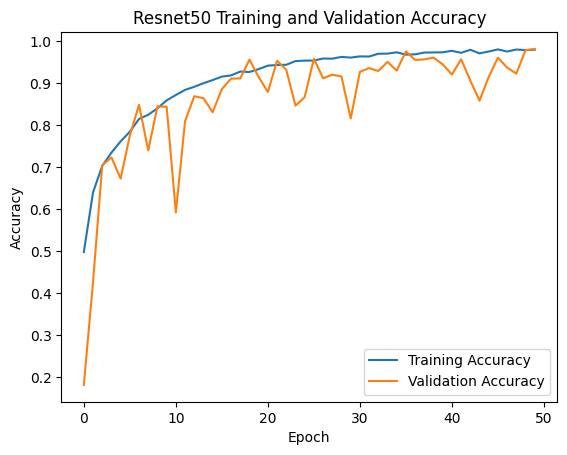

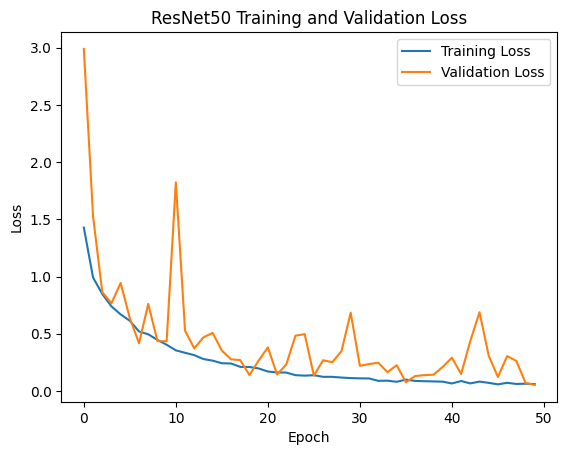

In [9]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Resnet50 Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('ResNet50 Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [12]:
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Load the test data
test_dir = r'D:\CADT\CapstoneProjectI\ml__model\data\splited_data\test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important for correct label ordering
)

# Get true labels and predictions
y_true = test_generator.classes  # True labels
y_pred = model.predict(test_generator)  # Predicted probabilities
y_pred = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_true, y_pred, average='weighted')  # Use 'weighted' for multi-class
f1 = f1_score(y_true, y_pred, average='weighted')  # Use 'weighted' for multi-class

# Print metrics
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))

Found 1182 images belonging to 9 classes.
37/37 [==============================] - 15s 404ms/step
Accuracy: 98.05%
Precision: 0.9814
Recall: 0.9805
F1-Score: 0.9806

Classification Report:
                        precision    recall  f1-score   support

 Bacterial Leaf Blight       0.95      0.97      0.96       120
            Brown Spot       1.00      0.98      0.99       155
     Healthy Rice Leaf       0.98      1.00      0.99       109
            Leaf Blast       0.98      0.99      0.99       175
            Leaf scald       1.00      0.91      0.95       134
Narrow Brown Leaf Spot       0.90      0.99      0.95        96
            Neck_Blast       1.00      1.00      1.00       100
            Rice Hispa       1.00      0.99      1.00       130
         Sheath Blight       0.99      0.99      0.99       163

              accuracy                           0.98      1182
             macro avg       0.98      0.98      0.98      1182
          weighted avg       0.98      0.

Found 1182 images belonging to 9 classes.
37/37 [==============================] - 7s 203ms/step
Accuracy: 0.98%
Precision: 0.9814
Recall: 0.9805
F1-Score: 0.9806

Classification Report:
                        precision    recall  f1-score   support

 Bacterial Leaf Blight       0.95      0.97      0.96       120
            Brown Spot       1.00      0.98      0.99       155
     Healthy Rice Leaf       0.98      1.00      0.99       109
            Leaf Blast       0.98      0.99      0.99       175
            Leaf scald       1.00      0.91      0.95       134
Narrow Brown Leaf Spot       0.90      0.99      0.95        96
            Neck_Blast       1.00      1.00      1.00       100
            Rice Hispa       1.00      0.99      1.00       130
         Sheath Blight       0.99      0.99      0.99       163

              accuracy                           0.98      1182
             macro avg       0.98      0.98      0.98      1182
          weighted avg       0.98      0.98

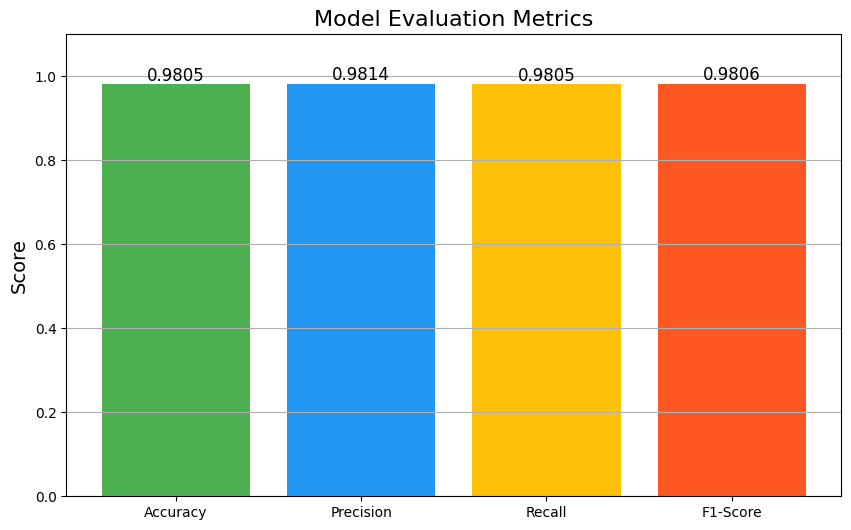

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the test data
test_dir = r'D:\CADT\CapstoneProjectI\ml__model\data\splited_data\test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important for correct label ordering
)

# Get true labels and predictions
y_true = test_generator.classes  # True labels
y_pred = model.predict(test_generator)  # Predicted probabilities
y_pred = np.argmax(y_pred, axis=1)  # Convert probabilities to class labels

# Calculate metrics
accuracy = accuracy_score(y_true, y_pred)
precision = precision_score(y_true, y_pred, average='weighted')  # Use 'weighted' for multi-class
recall = recall_score(y_true, y_pred, average='weighted')  # Use 'weighted' for multi-class
f1 = f1_score(y_true, y_pred, average='weighted')  # Use 'weighted' for multi-class

# Print metrics
print(f"Accuracy: {accuracy :.2f}%")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

# Detailed classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=test_generator.class_indices.keys()))

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_true, y_pred))

# Generate a bar graph for metrics
metrics = [accuracy, precision, recall, f1]
labels = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Create a bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(labels, metrics, color=['#4CAF50', '#2196F3', '#FFC107', '#FF5722'])

# Add data labels on top of each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2) if bar.get_x() == 0 else round(yval, 4), 
             ha='center', va='bottom', fontsize=12)

# Set title and labels
plt.title('Model Evaluation Metrics', fontsize=16)
plt.ylabel('Score', fontsize=14)
plt.ylim(0, 1.1)  # Adjust y-axis limit for better visualization

# Show the plot
plt.grid(axis='y')
plt.show()

Found 1182 images belonging to 9 classes.
37/37 [==============================] - 7s 204ms/step


<Figure size 1000x800 with 0 Axes>

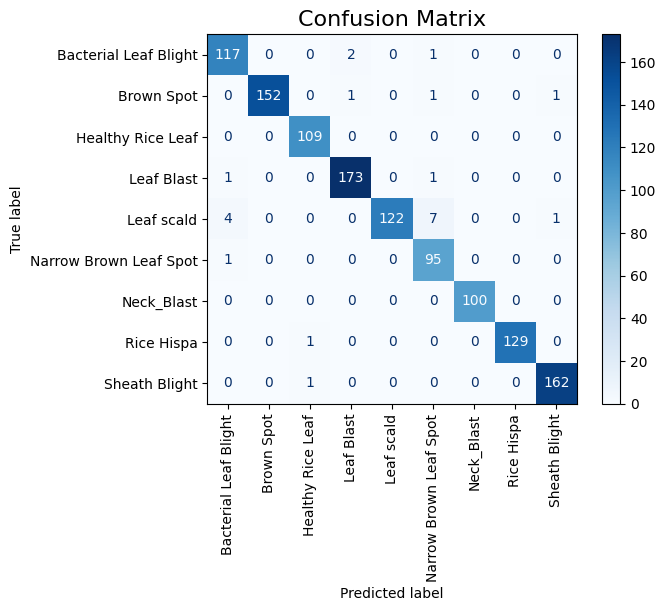

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the test data
test_dir = r'D:\CADT\CapstoneProjectI\ml__model\data\splited_data\test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_ds = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important for correct label ordering
)

# Get true labels from the 'test_ds' directory iterator
true_labels = test_ds.classes  # True labels

# Assuming 'model' is already trained
pred_probs = model.predict(test_ds)
pred_labels = np.argmax(pred_probs, axis=1)  # Convert probabilities to class labels

# Compute confusion matrix
conf_matrix = confusion_matrix(true_labels, pred_labels)

# Display the confusion matrix
class_labels = list(test_ds.class_indices.keys())  # Get class labels from the generator
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=class_labels)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
disp.plot(cmap=plt.cm.Blues)

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

plt.title('Confusion Matrix', fontsize=16)
plt.show()

Found 1182 images belonging to 9 classes.
37/37 [==============================] - 8s 212ms/step


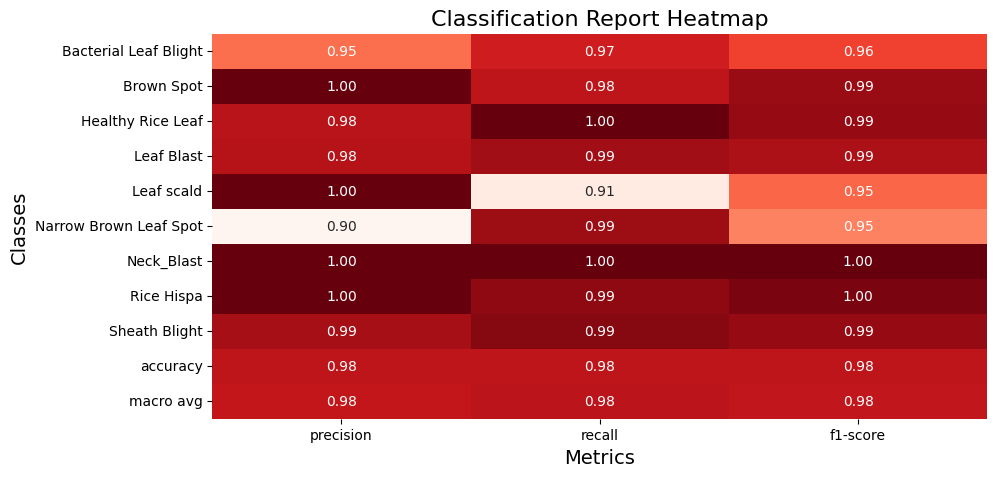

In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Load the test data
test_dir = r'D:\CADT\CapstoneProjectI\ml__model\data\splited_data\test'
test_datagen = ImageDataGenerator(rescale=1./255)
test_ds = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    shuffle=False  # Important for correct label ordering
)

# Get true labels from the 'test_ds' directory iterator
true_labels = test_ds.classes  # True labels

# Assuming 'model' is already trained
pred_probs = model.predict(test_ds)
pred_labels = np.argmax(pred_probs, axis=1)  # Convert probabilities to class labels

# Generate a classification report
report = classification_report(true_labels, pred_labels, target_names=list(test_ds.class_indices.keys()), output_dict=True)

# Convert the report to a DataFrame for better visualization
report_df = pd.DataFrame(report).transpose()

# Plot the heatmap
plt.figure(figsize=(10, 5))
sns.heatmap(report_df.iloc[:-1, :-1], annot=True, cmap=plt.cm.Reds, fmt=".2f", cbar=False)
plt.title('Classification Report Heatmap', fontsize=16)
plt.xlabel('Metrics', fontsize=14)
plt.ylabel('Classes', fontsize=14)
plt.show()

# **Testing Deep Learning Model With Web Data**

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from sklearn.metrics import accuracy_score

# Load your trained model
model = tf.keras.models.load_model(r'D:\CADT\CapstoneProjectI\ml__model\models\Resnet50Epoch100.keras')

# Directory containing images
image_folder = r'D:\CADT\CapstoneProjectI\ml__model\data\raw_images\test_data\Rice Leaf Disease Images'  # Adjust this path

# Function to load and preprocess images
def load_and_preprocess_image(image_path):
    img = load_img(image_path, target_size=(224, 224))  # Resize to your model's input size
    img_array = img_to_array(img) / 255.0  # Normalize the image
    return np.expand_dims(img_array, axis=0)  # Add batch dimension

# List to store predictions, true labels, and image names
predictions = []
true_labels = []
image_names = []

# True label index for "Brown Spot"
true_label_index = 1  # Adjust based on your class index mapping

# Iterate through images in the "Brown Spot" folder
for filename in os.listdir(image_folder):
    if filename.endswith('.jpg') or filename.endswith('.png'):  # Adjust as needed
        image_path = os.path.join(image_folder, filename)
        
        # Load and preprocess the image
        try:
            img_array = load_and_preprocess_image(image_path)
            # Make prediction
            prediction = model.predict(img_array)
            predictions.append(np.argmax(prediction, axis=1)[0])  # Get the predicted class
            image_names.append(filename)
            true_labels.append(true_label_index)  # Append the true label index for "Brown Spot"
        except Exception as e:
            print(f"Error processing {filename}: {e}")

# Calculate accuracy
if len(true_labels) == len(predictions):
    accuracy = accuracy_score(true_labels, predictions)
    print(f'Accuracy: {accuracy * 100:.2f}%')
else:
    print("Cannot calculate accuracy due to mismatched lengths.")

Accuracy: nan%


C:\Users\Hak Sou\AppData\Roaming\Python\Python310\site-packages\numpy\lib\function_base.py:518: RuntimeWarning: Mean of empty slice.
  avg = a.mean(axis, **keepdims_kw)
C:\Users\Hak Sou\AppData\Roaming\Python\Python310\site-packages\numpy\core\_methods.py:190: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
